In [4]:
# retrieve information about ephys data
# this is to explore the package availability in more detail
# exercise --> try to search for an 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient
from pynwb import NWBHDF5IO

In [ ]:
# Here we directly stream the data from the NWB servers hosted on S3

In [2]:
# define the dataset and the subject file you want to open
dandiset_id = "000004"
filepath = "sub-P11HMH/sub-P11HMH_ses-20061101_ecephys+image.nwb"
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, "draft").get_asset_by_path(filepath)
    s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)

In [5]:
# read in the path from the s3 bucket
# This can take a while!
io = NWBHDF5IO(s3_path, mode="r", driver="ros3")
nwbfile = io.read()

In [9]:
# accessingt the datafields
#here we access the stimulus data
stimulus_file = nwbfile.stimulus["StimulusPresentation"]
all_stimulus_data = stimulus_file.data[:]
print(all_stimulus_data.shape)

(200, 400, 300, 3)


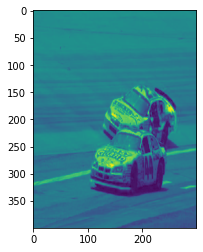

In [16]:
# what type of data do we have here?
plt.imshow(all_stimulus_data[7,:,:,-1])